<a href="https://colab.research.google.com/github/Gele12/Climate_Child-Health/blob/main/Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

In [ ]:
# Data Sources:
print("Data Sources:")
print("- Crop Yields and Child Malnutrition Data: FAOSTAT (Food and Agriculture Organization of the United Nations)")
print("- Climate Change Data (Temperature and Precipitation): World Bank Climate Change Knowledge Portal")
print("- Displacement Data: Internal Displacement Monitoring Center (IDMC)")
print("-" * 50)


Number_Hot_Days_30_Seasonal= pd.read_csv('Number_Hot_Days_30_Seasonal.csv')
Avg_Temp_Seasonal= pd.read_csv('Avg_Temp_Seasonal.csv')
Avg_Max_Temp_Seasonal= pd.read_csv('Avg_Max_Temp_Seasonal.csv')
r50mm_seasonal= pd.read_csv('r50mm_seasonal.csv')
r20mm_seasonal= pd.read_csv('r20mm_seasonal.csv')



Data Sources:
- Crop Yields and Child Malnutrition Data: FAOSTAT (Food and Agriculture Organization of the United Nations)
- Climate Change Data (Temperature and Precipitation): World Bank Climate Change Knowledge Portal
- Displacement Data: Internal Displacement Monitoring Center (IDMC)
--------------------------------------------------


# **Somalia Seasonal Temperature Trends**

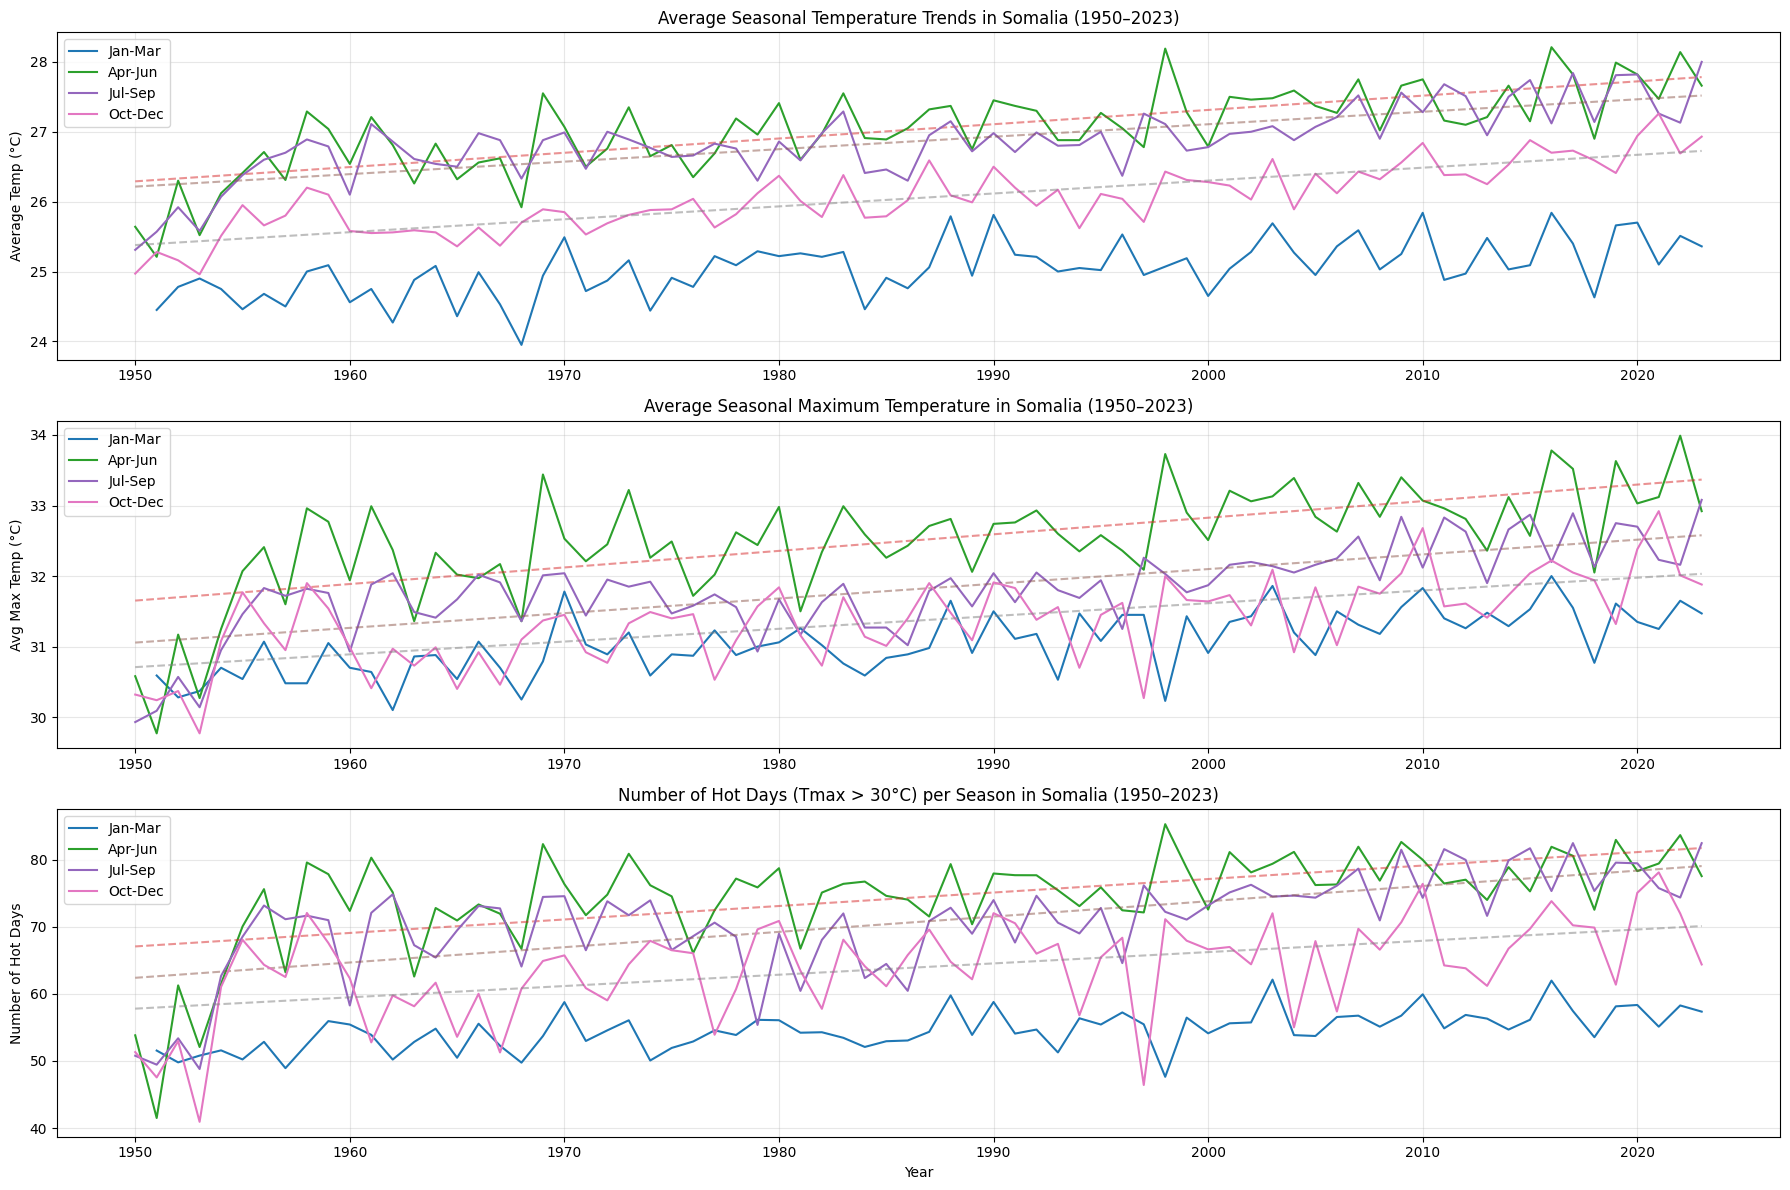

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Seasons
seasons = ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec']

# Set up the figure
plt.figure(figsize=(18, 12))

# --- 1. Average Seasonal Temperature ---
plt.subplot(3, 1, 1)
for season in seasons:
    df = avg_temp_seasonal[avg_temp_seasonal['Season'] == season]
    plt.plot(df['Year'], df['Avg_Temp'], label=season)
    # Fit and plot a linear trend
    if df['Avg_Temp'].notnull().sum() > 0:
        z = np.polyfit(df['Year'], df['Avg_Temp'], 1)
        p = np.poly1d(z)
        plt.plot(df['Year'], p(df['Year']), '--', alpha=0.5)
plt.title('Average Seasonal Temperature Trends in Somalia (1950–2023)')
plt.ylabel('Average Temp (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

# --- 2. Average Seasonal Maximum Temperature ---
plt.subplot(3, 1, 2)
for season in seasons:
    df = avg_max_temp_seasonal[avg_max_temp_seasonal['Season'] == season]
    plt.plot(df['Year'], df['Avg_Max_Temp'], label=season)
    # Fit and plot a linear trend
    if df['Avg_Max_Temp'].notnull().sum() > 0:
        z = np.polyfit(df['Year'], df['Avg_Max_Temp'], 1)
        p = np.poly1d(z)
        plt.plot(df['Year'], p(df['Year']), '--', alpha=0.5)
plt.title('Average Seasonal Maximum Temperature in Somalia (1950–2023)')
plt.ylabel('Avg Max Temp (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

# --- 3. Number of Hot Days (Tmax > 30°C) per Season ---
plt.subplot(3, 1, 3)
for season in seasons:
    df = number_hot_days_30_seasonal[number_hot_days_30_seasonal['Season'] == season]
    plt.plot(df['Year'], df['Number_Hot_Days>30'], label=season)
    # Fit and plot a linear trend
    if df['Number_Hot_Days>30'].notnull().sum() > 0:
        z = np.polyfit(df['Year'], df['Number_Hot_Days>30'], 1)
        p = np.poly1d(z)
        plt.plot(df['Year'], p(df['Year']), '--', alpha=0.5)
plt.title('Number of Hot Days (Tmax > 30°C) per Season in Somalia (1950–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Hot Days')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('somalia_seasonal_temperature_trends.png')
plt.show()


# **Seasonal Precipitation Trends in Somalia**

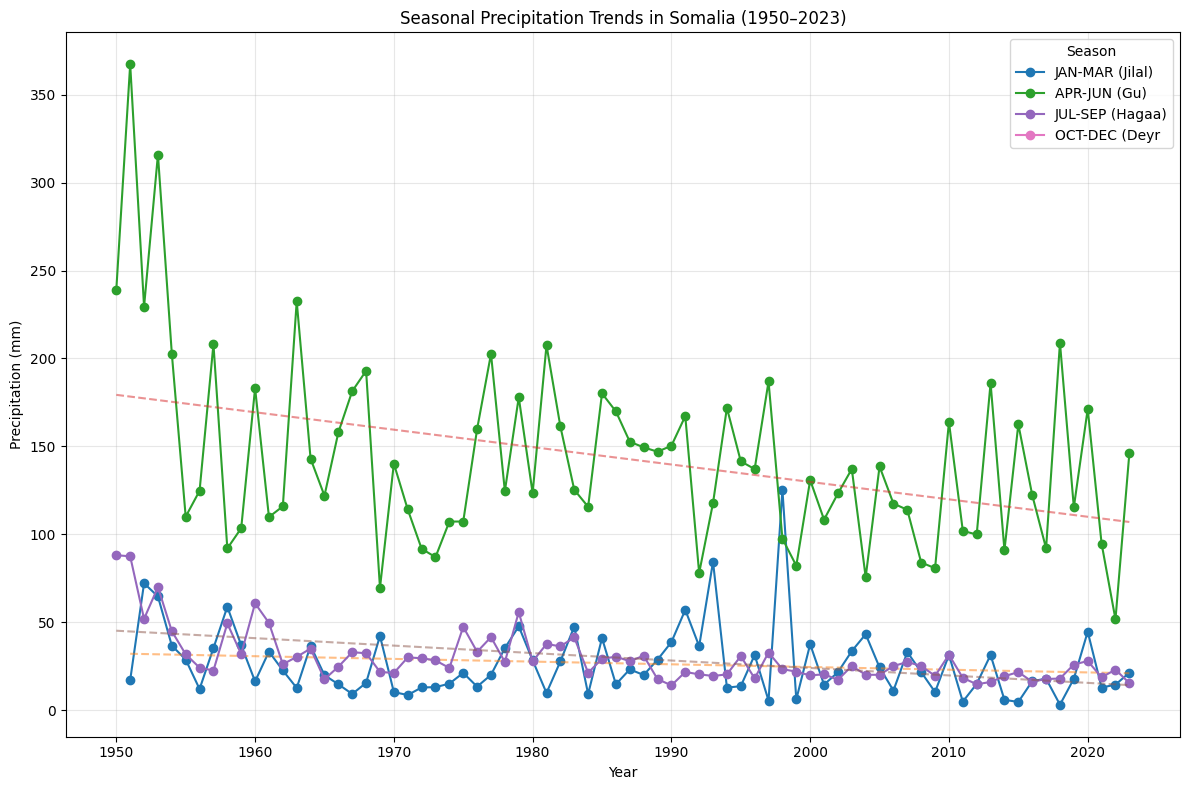

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Somali Seasons
season_rename = {
    'Jan-Mar': 'JAN-MAR (Jilal)',
    'Apr-Jun': 'APR-JUN (Gu)',
    'Jul-Sep': 'JUL-SEP (Hagaa)',
    'Oct-Dec': 'OCT-DEC (Deyr)'
}
seasonal_precip['Season'] = seasonal_precip['Season'].replace(season_rename)

# Order seasons
season_order = ['JAN-MAR (Jilal)', 'APR-JUN (Gu)', 'JUL-SEP (Hagaa)', 'OCT-DEC (Deyr']
seasonal_precip['Season'] = pd.Categorical(seasonal_precip['Season'], categories=season_order, ordered=True)

# Filtering
seasonal_precip = seasonal_precip[np.isfinite(seasonal_precip['Precip'])]
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] < 2000]  # Adjust threshold if needed

# Seasonal precipitation trends plot
plt.figure(figsize=(12, 8))
for season in season_order:
    df = seasonal_precip[seasonal_precip['Season'] == season]
    plt.plot(df['Year'], df['Precip'], marker='o', label=season)
    # Fit and plot a linear trend if enough data
    if len(df) > 1:
        z = np.polyfit(df['Year'], df['Precip'], 1)
        p = np.poly1d(z)
        plt.plot(df['Year'], p(df['Year']), '--', alpha=0.5)

plt.title('Seasonal Precipitation Trends in Somalia (1950–2023)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Season')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('somalia_seasonal_precipitation_trends.png')
plt.show()





# **Extreme Weather Events duration and frequency**

<ipython-input-63-6b1c0b5e919f>:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_summary = seasonal_precip.groupby(['Year', 'Season']).agg(


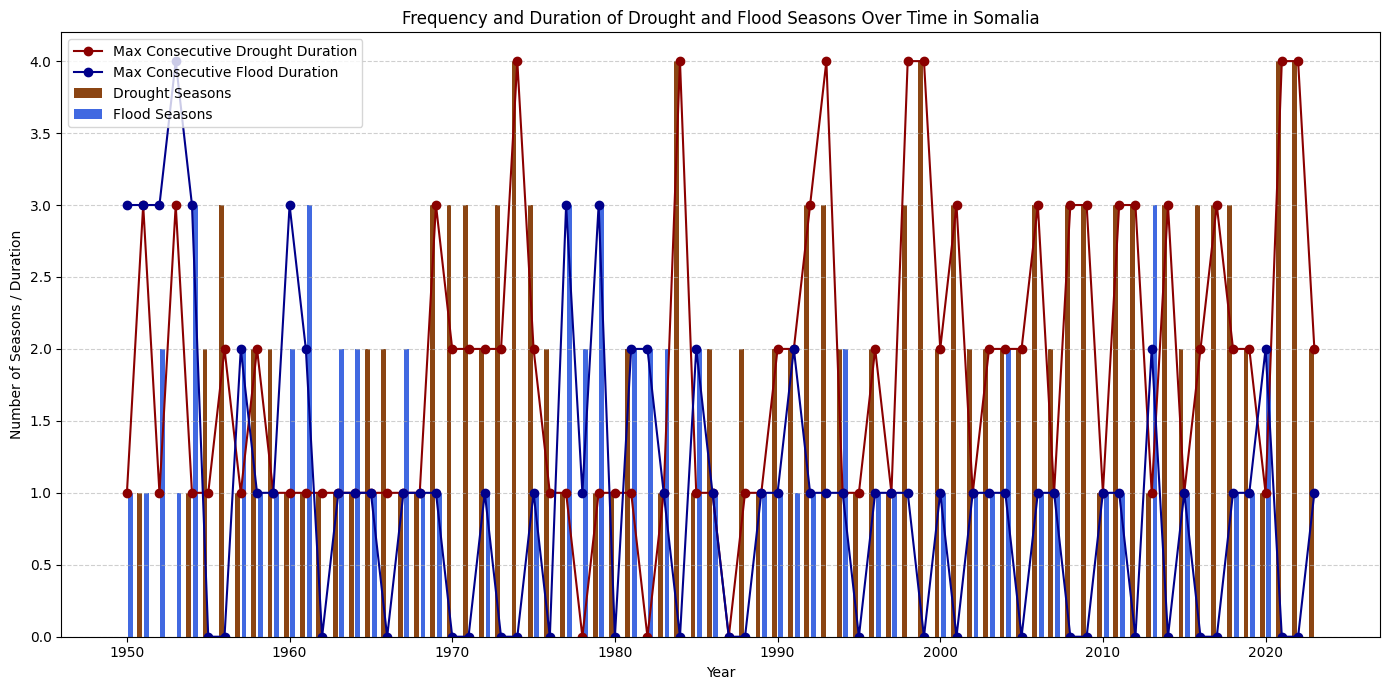

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# --- Cleaning annual_precip
annual_precip = annual_precip[['Year', 'annual_precip']].dropna()
annual_precip = annual_precip[annual_precip['annual_precip'] >= 0]

# --- Cleaning seasonal_precip ---
seasonal_precip = seasonal_precip.dropna(subset=['Precip', 'Year', 'Season'])
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] >= 0]
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] < 2000]

# Somali season mapping
season_rename = {
    'Jan-Mar': 'Jilal',
    'Apr-Jun': 'Gu',
    'Jul-Sep': 'Hagaa',
    'Oct-Dec': 'Deyr'
}
seasonal_precip['Season'] = seasonal_precip['Season'].replace(season_rename)

# --- Long-term mean for each season ---
clim = seasonal_precip.groupby('Season')['Precip'].mean().to_dict()
seasonal_precip['clim'] = seasonal_precip['Season'].astype(str).map(clim)

# Removing seasons with very small climatology
min_clim = 20  # mm, adjust as needed
seasonal_precip = seasonal_precip[seasonal_precip['clim'] >= min_clim]

# Calculate anomaly (% of normal)
seasonal_precip['anomaly_percent'] = 100 * (seasonal_precip['Precip'] - seasonal_precip['clim']) / seasonal_precip['clim']

# Cap extreme anomalies
seasonal_precip = seasonal_precip[(seasonal_precip['anomaly_percent'] > -100) & (seasonal_precip['anomaly_percent'] < 100)]

# Set Season as categorical for plotting
season_order = ['Jilal', 'Gu', 'Hagaa', 'Deyr']
seasonal_precip['Season'] = pd.Categorical(seasonal_precip['Season'], categories=season_order, ordered=True)

# --- Define drought and flood events (relative to normal) ---
seasonal_precip['drought'] = seasonal_precip['anomaly_percent'] < -15
seasonal_precip['flood'] = seasonal_precip['anomaly_percent'] > 15

# Ensure boolean columns
seasonal_precip['drought'] = seasonal_precip['drought'].fillna(False).astype(bool)
seasonal_precip['flood'] = seasonal_precip['flood'].fillna(False).astype(bool)

# --- Count droughts and floods per year/season ---
event_summary = seasonal_precip.groupby(['Year', 'Season']).agg(
    precip=('Precip', 'first'),
    anomaly_percent=('anomaly_percent', 'first'),
    drought=('drought', 'first'),
    flood=('flood', 'first')
).reset_index()

# --- Duration of consecutive droughts and floods per year calculation ---
season_order_dict = {season: i for i, season in enumerate(season_order)}
event_summary['Season_order'] = event_summary['Season'].map(season_order_dict)
event_summary = event_summary.sort_values(['Year', 'Season_order']).reset_index(drop=True)

def max_consecutive_true(series):
    max_count = count = 0
    for val in series:
        if val:
            count += 1
            max_count = max(max_count, count)
        else:
            count = 0
    return max_count

max_droughts = []
max_floods = []
for year, group in event_summary.groupby('Year'):
    max_droughts.append(max_consecutive_true(group['drought'].values))
    max_floods.append(max_consecutive_true(group['flood'].values))

consecutive_df = pd.DataFrame({'Year': sorted(event_summary['Year'].unique()),
                               'max_consecutive_droughts': max_droughts,
                               'max_consecutive_floods': max_floods})

# --- Analyzing frequency and severity over time ---
event_counts = event_summary.groupby('Year').agg(
    droughts=('drought', 'sum'),
    floods=('flood', 'sum'),
    mean_drought_severity=('anomaly_percent', lambda x: x[x < -15].mean()),
    mean_flood_severity=('anomaly_percent', lambda x: x[x > 15].mean())
).reset_index()

# --- Merge consecutive duration data
final_df = event_counts.merge(consecutive_df, on='Year', how='left')

# --- Visualize: Drought and Flood Frequency and Duration Over Time ---
plt.figure(figsize=(14, 7))
plt.bar(final_df['Year'] - 0.2, final_df['droughts'], width=0.3, label='Drought Seasons', color='saddlebrown')
plt.bar(final_df['Year'] + 0.2, final_df['floods'], width=0.3, label='Flood Seasons', color='royalblue')
plt.plot(final_df['Year'], final_df['max_consecutive_droughts'], label='Max Consecutive Drought Duration', color='darkred', marker='o')
plt.plot(final_df['Year'], final_df['max_consecutive_floods'], label='Max Consecutive Flood Duration', color='darkblue', marker='o')
plt.title('Frequency and Duration of Drought and Flood Seasons Over Time in Somalia')
plt.xlabel('Year')
plt.ylabel('Number of Seasons / Duration')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Crop Yields Over the Years**

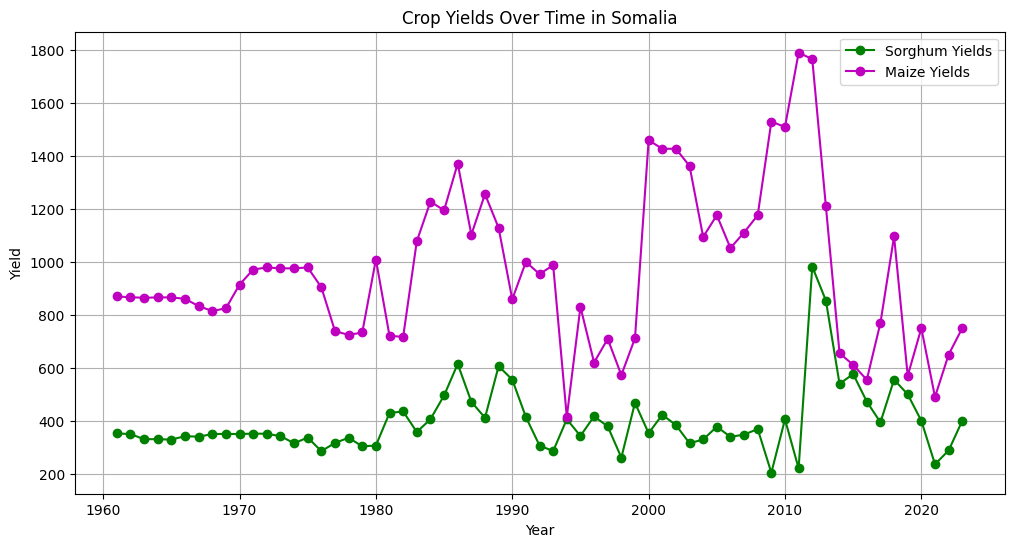

In [ ]:
plt.figure(figsize=(12, 6))

# Yearly aggregates for maize and sorghum yields
yearly_maize = df_maize.groupby('Year')['maize_yields'].mean().reset_index()
yearly_sorghum = df_sorghum.groupby('Year')['Sorghum_yields'].mean().reset_index()

plt.plot(yearly_sorghum['Year'], yearly_sorghum['Sorghum_yields'], 'g-o', label='Sorghum Yields')
plt.plot(yearly_maize['Year'], yearly_maize['maize_yields'], 'm-o', label='Maize Yields')
plt.title('Crop Yields Over Time in Somalia')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

# **Child Malnutrition Over Time**

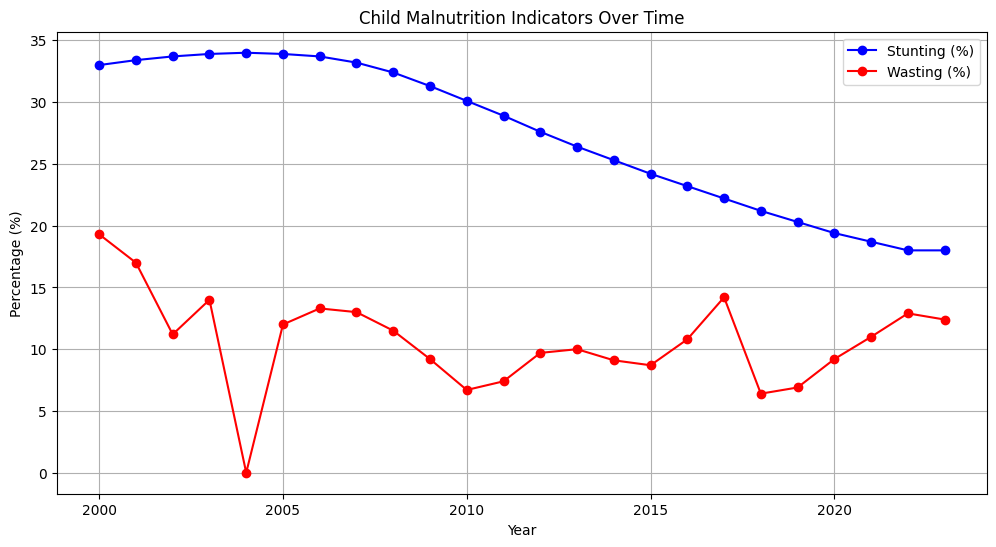

In [ ]:
plt.figure(figsize=(12, 6))

# Create yearly aggregates for child malnutrition
yearly_malnutrition = df_malnutrition.groupby('Year').agg({
    'Stunting (%)': 'mean',
    'Wasting (%)': 'mean'
}).reset_index()

plt.plot(yearly_malnutrition['Year'], yearly_malnutrition['Stunting (%)'], 'b-o', label='Stunting (%)')
plt.plot(yearly_malnutrition['Year'], yearly_malnutrition['Wasting (%)'], 'r-o', label='Wasting (%)')
plt.title('Child Malnutrition Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.savefig('malnutrition_time_series.png')
plt.show()

# **Extreme Weather Events on Crop Yields**

---



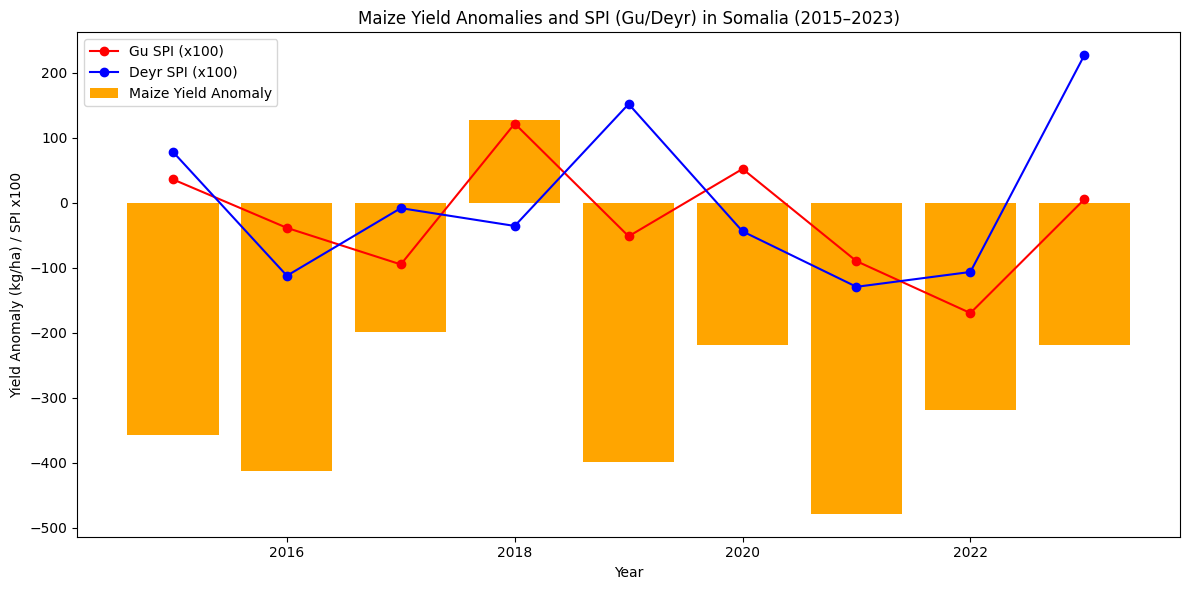

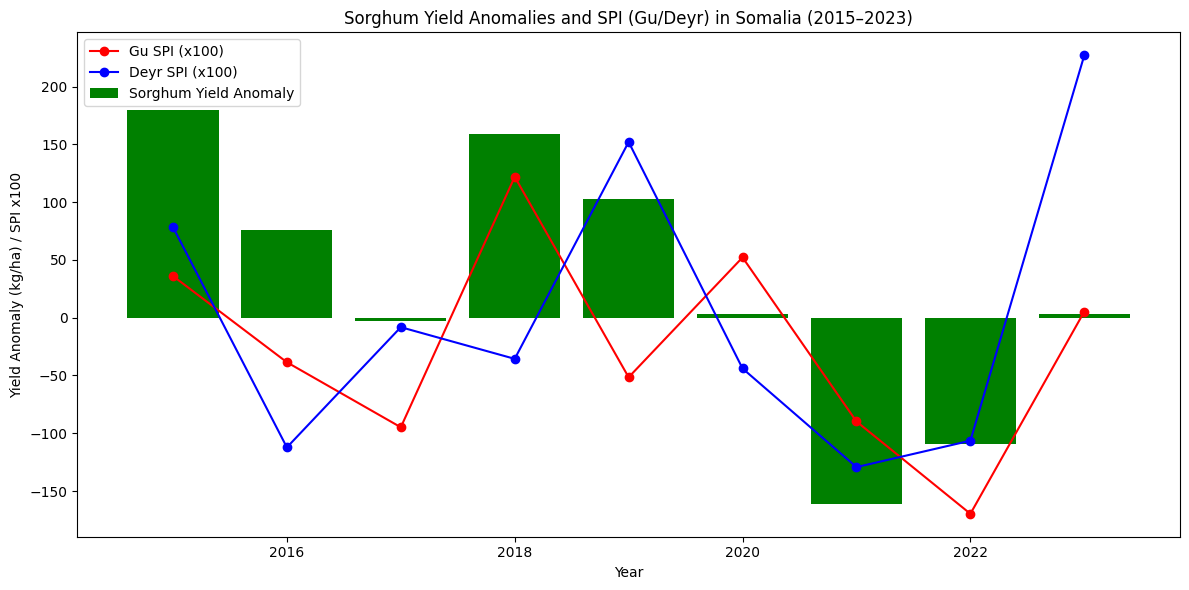

Recent years (2015–2023) summary:
    Year  maize_yields  maize_anomaly    gu_spi  deyr_spi  \
54  2015         611.1    -357.544444  0.360320  0.783841   
55  2016         555.1    -413.544444 -0.385741 -1.122434   
56  2017         770.0    -198.644444 -0.948394 -0.082259   
57  2018        1096.8     128.155556  1.218763 -0.356306   
58  2019         570.0    -398.644444 -0.515556  1.520295   
59  2020         750.0    -218.644444  0.521475 -0.439774   
60  2021         490.0    -478.644444 -0.898322 -1.293020   
61  2022         650.0    -318.644444 -1.697051 -1.064515   
62  2023         750.0    -218.644444  0.053031  2.270713   

    Number_Days_Precip>20(mm)  Number_Days_Precip>50(mm)  drought_seasons  \
54                       1.44                       0.12                0   
55                       0.80                       0.13                1   
56                       1.29                       0.12                1   
57                       1.58                  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



# --- Loading and processing seasonal_precip for SPI and drought/flood ---
seasonal_precip = pd.read_csv('seasonal_precip.csv')
seasonal_precip = seasonal_precip.dropna(subset=['Precip', 'Year', 'Season'])
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] >= 0]
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] < 2000]
season_rename = {'Jan-Mar': 'Jilal', 'Apr-Jun': 'Gu', 'Jul-Sep': 'Hagaa', 'Oct-Dec': 'Deyr'}
seasonal_precip['Season'] = seasonal_precip['Season'].replace(season_rename)
seasonal_precip = seasonal_precip[seasonal_precip['Season'].isin(['Gu', 'Deyr'])]

# SPI for Gu and Deyr Calculation
def calc_spi(series):
    valid = series.dropna()
    if valid.std() == 0 or len(valid) < 2:
        return pd.Series([np.nan]*len(series), index=series.index)
    return (series - valid.mean()) / valid.std()

spi_gu = calc_spi(seasonal_precip[seasonal_precip['Season'] == 'Gu'].set_index('Year')['Precip'])
spi_deyr = calc_spi(seasonal_precip[seasonal_precip['Season'] == 'Deyr'].set_index('Year')['Precip'])

spi_df = pd.DataFrame({
    'Year': sorted(set(spi_gu.index).union(set(spi_deyr.index))),
    'gu_spi': spi_gu.reindex(sorted(set(spi_gu.index).union(set(spi_deyr.index)))).values,
    'deyr_spi': spi_deyr.reindex(sorted(set(spi_gu.index).union(set(spi_deyr.index)))).values
})

# Frequency of consecutive drought/flood seasons calculation
seasonal_precip['clim'] = seasonal_precip.groupby('Season')['Precip'].transform('mean')
seasonal_precip['anomaly_percent'] = 100 * (seasonal_precip['Precip'] - seasonal_precip['clim']) / seasonal_precip['clim']
seasonal_precip['drought'] = seasonal_precip['anomaly_percent'] < -15
seasonal_precip['flood'] = seasonal_precip['anomaly_percent'] > 15

season_order = ['Jilal', 'Gu', 'Hagaa', 'Deyr']
season_order_dict = {season: i for i, season in enumerate(season_order)}
seasonal_precip['Season_order'] = seasonal_precip['Season'].map(season_order_dict)
seasonal_precip = seasonal_precip.sort_values(['Year', 'Season_order']).reset_index(drop=True)

def max_consecutive_true(series):
    max_count = count = 0
    for val in series:
        if val:
            count += 1
            max_count = max(max_count, count)
        else:
            count = 0
    return max_count

annual_events = []
for year, group in seasonal_precip.groupby('Year'):
    droughts = group['drought'].sum()
    floods = group['flood'].sum()
    max_consec_drought = max_consecutive_true(group['drought'].values)
    max_consec_flood = max_consecutive_true(group['flood'].values)
    annual_events.append({
        'Year': year,
        'drought_seasons': droughts,
        'flood_seasons': floods,
        'max_consecutive_droughts': max_consec_drought,
        'max_consecutive_floods': max_consec_flood
    })
annual_events_df = pd.DataFrame(annual_events)

# --- Merge all indices with yields ---
maize_merged = pd.merge(maize, r20mm_annual, on='Year', how='left')
maize_merged = pd.merge(maize_merged, r50mm_annual, on='Year', how='left')
maize_merged = pd.merge(maize_merged, spi_df, on='Year', how='left')
maize_merged = pd.merge(maize_merged, annual_events_df, on='Year', how='left')

sorghum_merged = pd.merge(sorghum, r20mm_annual, on='Year', how='left')
sorghum_merged = pd.merge(sorghum_merged, r50mm_annual, on='Year', how='left')
sorghum_merged = pd.merge(sorghum_merged, spi_df, on='Year', how='left')
sorghum_merged = pd.merge(sorghum_merged, annual_events_df, on='Year', how='left')

# --- Calculate yield anomalies ---
maize_merged['maize_anomaly'] = maize_merged['maize_yields'] - maize_merged['maize_yields'].mean()
sorghum_merged['sorghum_anomaly'] = sorghum_merged['Sorghum_yields'] - sorghum_merged['Sorghum_yields'].mean()

# --- Focus on recent years (2015–2023) ---
recent_years = list(range(2015, 2024))
maize_recent = maize_merged[maize_merged['Year'].isin(recent_years)].copy()
sorghum_recent = sorghum_merged[sorghum_merged['Year'].isin(recent_years)].copy()

# --- Visualize yield anomalies and extreme indices for recent years ---
plt.figure(figsize=(12,6))
plt.bar(maize_recent['Year'], maize_recent['maize_anomaly'], color='orange', label='Maize Yield Anomaly')
plt.plot(maize_recent['Year'], maize_recent['gu_spi']*100, color='red', marker='o', label='Gu SPI (x100)')
plt.plot(maize_recent['Year'], maize_recent['deyr_spi']*100, color='blue', marker='o', label='Deyr SPI (x100)')
plt.title('Maize Yield Anomalies and SPI (Gu/Deyr) in Somalia (2015–2023)')
plt.xlabel('Year')
plt.ylabel('Yield Anomaly (kg/ha) / SPI x100')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.bar(sorghum_recent['Year'], sorghum_recent['sorghum_anomaly'], color='green', label='Sorghum Yield Anomaly')
plt.plot(sorghum_recent['Year'], sorghum_recent['gu_spi']*100, color='red', marker='o', label='Gu SPI (x100)')
plt.plot(sorghum_recent['Year'], sorghum_recent['deyr_spi']*100, color='blue', marker='o', label='Deyr SPI (x100)')
plt.title('Sorghum Yield Anomalies and SPI (Gu/Deyr) in Somalia (2015–2023)')
plt.xlabel('Year')
plt.ylabel('Yield Anomaly (kg/ha) / SPI x100')
plt.legend()
plt.tight_layout()
plt.show()

# --- Print summary statistics for discussion ---
print("Recent years (2015–2023) summary:")
print(maize_recent[['Year','maize_yields','maize_anomaly','gu_spi','deyr_spi','Number_Days_Precip>20(mm)','Number_Days_Precip>50(mm)','drought_seasons','flood_seasons']])
print(sorghum_recent[['Year','Sorghum_yields','sorghum_anomaly','gu_spi','deyr_spi','Number_Days_Precip>20(mm)','Number_Days_Precip>50(mm)','drought_seasons','flood_seasons']])








# **Yield Volatility Against Extreme Events (Droughts/Floods)**

Maize yield SD: 299.44, Mean: 968.64, CV: 30.91%
Sorghum yield SD: 129.81, Mean: 396.92, CV: 32.70%

Maize yield rolling volatility (3-year SD) by drought category:
 drought_category
No Drought    134.683373
Mild          118.902543
Moderate      149.012829
Severe        130.081834
Name: maize_rolling_std, dtype: float64

Sorghum yield rolling volatility (3-year SD) by drought category:
 drought_category
No Drought    58.283401
Mild          62.604305
Moderate      62.023584
Severe        79.604622
Name: sorghum_rolling_std, dtype: float64

Maize yield rolling volatility (3-year SD) by flood category:
 flood_category
No Flood    133.148156
Mild        129.772058
Moderate    136.657010
Severe      152.855043
Name: maize_rolling_std, dtype: float64

Sorghum yield rolling volatility (3-year SD) by flood category:
 flood_category
No Flood     72.224476
Mild         64.856521
Moderate     44.841133
Severe      149.988251
Name: sorghum_rolling_std, dtype: float64


<ipython-input-67-7a98e172856d>:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maize_volatility_by_drought = maize_merged.groupby('drought_category')['maize_rolling_std'].mean()
<ipython-input-67-7a98e172856d>:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorghum_volatility_by_drought = sorghum_merged.groupby('drought_category')['sorghum_rolling_std'].mean()
<ipython-input-67-7a98e172856d>:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

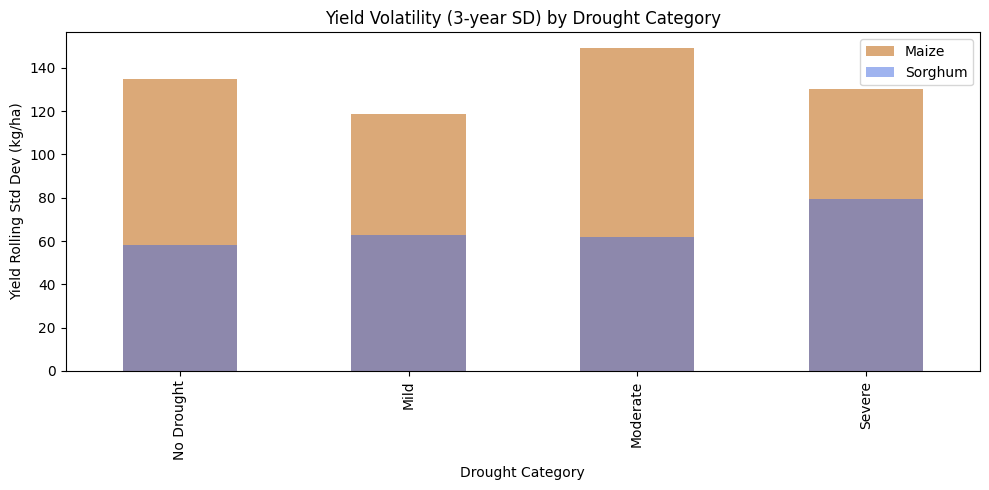

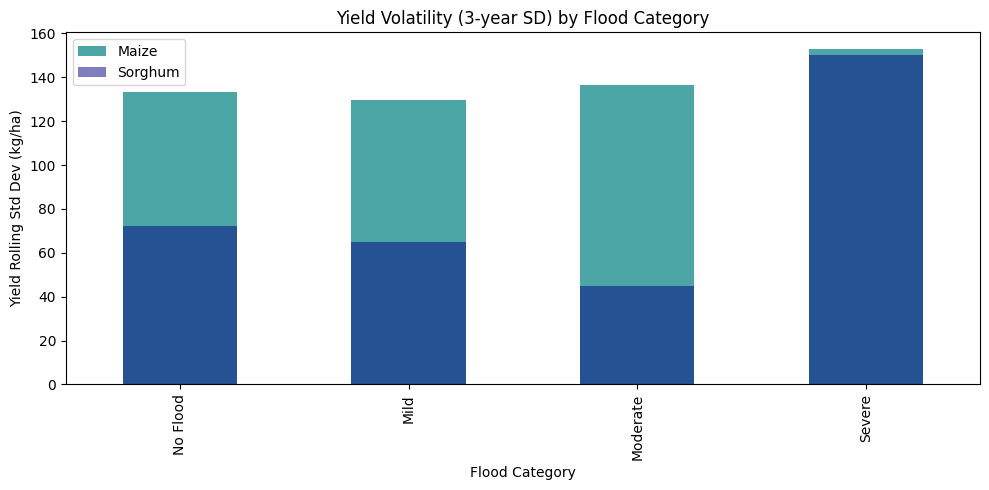

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# --- Interannual yield variability (SD and CV) Calculation ---
maize_std = maize_yields['maize_yields'].std()
maize_mean = maize_yields['maize_yields'].mean()
maize_cv = maize_std / maize_mean * 100  # coefficient of variation in %

sorghum_std = sorghum_yields['Sorghum_yields'].std()
sorghum_mean = sorghum_yields['Sorghum_yields'].mean()
sorghum_cv = sorghum_std / sorghum_mean * 100

print(f"Maize yield SD: {maize_std:.2f}, Mean: {maize_mean:.2f}, CV: {maize_cv:.2f}%")
print(f"Sorghum yield SD: {sorghum_std:.2f}, Mean: {sorghum_mean:.2f}, CV: {sorghum_cv:.2f}%")

# --- Loading and cleaning seasonal precipitation data ---
seasonal_precip = pd.read_csv('seasonal_precip.csv')
seasonal_precip = seasonal_precip.dropna(subset=['Precip', 'Year', 'Season'])
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] >= 0]
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] < 2000]
season_rename = {'Jan-Mar': 'Jilal', 'Apr-Jun': 'Gu', 'Jul-Sep': 'Hagaa', 'Oct-Dec': 'Deyr'}
seasonal_precip['Season'] = seasonal_precip['Season'].replace(season_rename)
clim = seasonal_precip.groupby('Season')['Precip'].mean().to_dict()
seasonal_precip['clim'] = seasonal_precip['Season'].astype(str).map(clim)
seasonal_precip['anomaly_percent'] = 100 * (seasonal_precip['Precip'] - seasonal_precip['clim']) / seasonal_precip['clim']
seasonal_precip = seasonal_precip[(seasonal_precip['anomaly_percent'] > -100) & (seasonal_precip['anomaly_percent'] < 100)]
seasonal_precip['drought'] = seasonal_precip['anomaly_percent'] < -15
seasonal_precip['flood'] = seasonal_precip['anomaly_percent'] > 15

# --- Aggregate drought/flood events to annual scale ---
def max_consecutive_true(series):
    max_count = count = 0
    for val in series:
        if val:
            count += 1
            max_count = max(max_count, count)
        else:
            count = 0
    return max_count

annual_events = []
for year, group in seasonal_precip.groupby('Year'):
    droughts = group['drought'].sum()
    floods = group['flood'].sum()
    max_consec_drought = max_consecutive_true(group['drought'].values)
    max_consec_flood = max_consecutive_true(group['flood'].values)
    annual_events.append({
        'Year': year,
        'drought_seasons': droughts,
        'flood_seasons': floods,
        'max_consecutive_droughts': max_consec_drought,
        'max_consecutive_floods': max_consec_flood
    })
annual_events_df = pd.DataFrame(annual_events)

# --- Merge annual events with yields ---
maize_merged = pd.merge(maize_yields, annual_events_df, on='Year', how='left')
sorghum_merged = pd.merge(sorghum_yields, annual_events_df, on='Year', how='left')

# --- Rolling window volatility (3-year rolling SD) calculation---
maize_merged['maize_rolling_std'] = maize_merged['maize_yields'].rolling(window=3, min_periods=1).std()
sorghum_merged['sorghum_rolling_std'] = sorghum_merged['Sorghum_yields'].rolling(window=3, min_periods=1).std()

# --- Categorize years by drought/flood severity ---
maize_merged['drought_seasons'] = maize_merged['drought_seasons'].fillna(0)
maize_merged['flood_seasons'] = maize_merged['flood_seasons'].fillna(0)
sorghum_merged['drought_seasons'] = sorghum_merged['drought_seasons'].fillna(0)
sorghum_merged['flood_seasons'] = sorghum_merged['flood_seasons'].fillna(0)

maize_merged['drought_category'] = pd.cut(maize_merged['drought_seasons'], bins=[-1,0,1,2,4], labels=['No Drought','Mild','Moderate','Severe'])
sorghum_merged['drought_category'] = pd.cut(sorghum_merged['drought_seasons'], bins=[-1,0,1,2,4], labels=['No Drought','Mild','Moderate','Severe'])
maize_merged['flood_category'] = pd.cut(maize_merged['flood_seasons'], bins=[-1,0,1,2,4], labels=['No Flood','Mild','Moderate','Severe'])
sorghum_merged['flood_category'] = pd.cut(sorghum_merged['flood_seasons'], bins=[-1,0,1,2,4], labels=['No Flood','Mild','Moderate','Severe'])

# --- Calculate mean rolling std dev by drought/flood category ---
maize_volatility_by_drought = maize_merged.groupby('drought_category')['maize_rolling_std'].mean()
sorghum_volatility_by_drought = sorghum_merged.groupby('drought_category')['sorghum_rolling_std'].mean()
maize_volatility_by_flood = maize_merged.groupby('flood_category')['maize_rolling_std'].mean()
sorghum_volatility_by_flood = sorghum_merged.groupby('flood_category')['sorghum_rolling_std'].mean()

print("\nMaize yield rolling volatility (3-year SD) by drought category:\n", maize_volatility_by_drought)
print("\nSorghum yield rolling volatility (3-year SD) by drought category:\n", sorghum_volatility_by_drought)
print("\nMaize yield rolling volatility (3-year SD) by flood category:\n", maize_volatility_by_flood)
print("\nSorghum yield rolling volatility (3-year SD) by flood category:\n", sorghum_volatility_by_flood)

# --- Visualization: Yield volatility vs. drought/flood severity ---
plt.figure(figsize=(10,5))
maize_volatility_by_drought.plot(kind='bar', color='peru', alpha=0.7, label='Maize')
sorghum_volatility_by_drought.plot(kind='bar', color='royalblue', alpha=0.5, label='Sorghum')
plt.title('Yield Volatility (3-year SD) by Drought Category')
plt.ylabel('Yield Rolling Std Dev (kg/ha)')
plt.xlabel('Drought Category')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
maize_volatility_by_flood.plot(kind='bar', color='teal', alpha=0.7, label='Maize')
sorghum_volatility_by_flood.plot(kind='bar', color='navy', alpha=0.5, label='Sorghum')
plt.title('Yield Volatility (3-year SD) by Flood Category')
plt.ylabel('Yield Rolling Std Dev (kg/ha)')
plt.xlabel('Flood Category')
plt.legend()
plt.tight_layout()
plt.show()



# **Crop Yield Analysis Against Climate Variables**

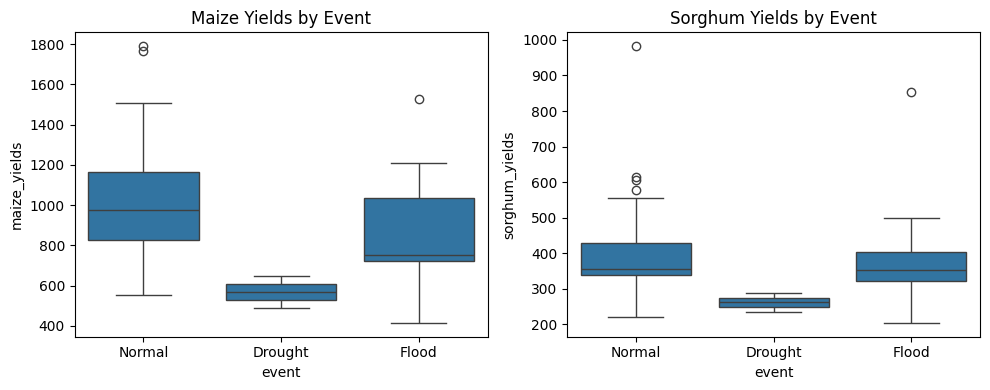


T-tests for maize_yields:
Drought vs Normal: t=-2.11, p=0.040, mean(Drought)=570.00, mean(Normal)=1005.69
Flood vs Normal: t=-1.36, p=0.178, mean(Flood)=872.74, mean(Normal)=1005.69

T-tests for sorghum_yields:
Drought vs Normal: t=-1.61, p=0.114, mean(Drought)=262.00, mean(Normal)=401.71
Flood vs Normal: t=-0.05, p=0.963, mean(Flood)=399.70, mean(Normal)=401.71

Mean yields by event class:
          maize_yields  sorghum_yields
event                                
Drought    570.000000         262.000
Flood      872.736364         399.700
Normal    1005.690000         401.706


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# --- Load Data ---
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
rx1day = pd.read_csv("rx1day_annual.csv")
r95 = pd.read_csv("r95ptot_annual.csv")
seasonal_precip = pd.read_csv("seasonal_precip.csv")

# Standardize columns
maize.columns = maize.columns.str.strip().str.lower().str.replace(' ', '_')
sorghum.columns = sorghum.columns.str.strip().str.lower().str.replace(' ', '_')
rx1day.columns = rx1day.columns.str.strip().str.lower().str.replace(' ', '_')
r95.rename(columns={'Year': 'year', 'total_precip_95p(mm)': 'r95ptot_annual'}, inplace=True)
seasonal_precip.columns = seasonal_precip.columns.str.strip().str.replace(' ', '_')

# Clean and filter seasonal_precip
seasonal_precip = seasonal_precip.dropna(subset=['Precip', 'Year', 'Season'])
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] >= 0]
seasonal_precip = seasonal_precip[seasonal_precip['Precip'] < 2000]
season_rename = {'Jan-Mar': 'Jilal', 'Apr-Jun': 'Gu', 'Jul-Sep': 'Hagaa', 'Oct-Dec': 'Deyr'}
seasonal_precip['Season'] = seasonal_precip['Season'].replace(season_rename)
seasonal_precip = seasonal_precip[seasonal_precip['Season'].isin(['Gu', 'Deyr'])]

# --- Calculate SPI for Gu and Deyr ---
def calc_spi(series):
    valid = series.dropna()
    if valid.std() == 0 or len(valid) < 2:
        return pd.Series([np.nan]*len(series), index=series.index)
    return (series - valid.mean()) / valid.std()

spi_gu = calc_spi(seasonal_precip[seasonal_precip['Season'] == 'Gu'].set_index('Year')['Precip'])
spi_deyr = calc_spi(seasonal_precip[seasonal_precip['Season'] == 'Deyr'].set_index('Year')['Precip'])

spi_df = pd.DataFrame({
    'year': sorted(set(spi_gu.index).union(set(spi_deyr.index))),
    'gu_spi': spi_gu.reindex(sorted(set(spi_gu.index).union(set(spi_deyr.index)))).values,
    'deyr_spi': spi_deyr.reindex(sorted(set(spi_gu.index).union(set(spi_deyr.index)))).values
})

# --- Merge All Data on Year ---
df = maize.merge(sorghum, on='year', suffixes=('_maize', '_sorghum')) \
          .merge(spi_df, on='year', how='left') \
          .merge(rx1day[['year', 'rx1day']], on='year', how='left') \
          .merge(r95[['year', 'r95ptot_annual']], on='year', how='left')

# --- Calculate average SPI for classification ---
df['spi'] = df[['gu_spi', 'deyr_spi']].mean(axis=1)

# --- Classify Years ---
spi_thresh = -1
rx1day_thresh = df['rx1day'].quantile(0.9)
r95_thresh = df['r95ptot_annual'].quantile(0.9)

def classify_event(row):
    if row['spi'] < spi_thresh:
        return 'Drought'
    elif (row['rx1day'] > rx1day_thresh) or (row['r95ptot_annual'] > r95_thresh):
        return 'Flood'
    else:
        return 'Normal'

df['event'] = df.apply(classify_event, axis=1)

# --- Boxplots of Yields by Event Class ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='event', y='maize_yields', data=df, order=['Normal','Drought','Flood'])
plt.title('Maize Yields by Event')
plt.subplot(1,2,2)
sns.boxplot(x='event', y='sorghum_yields', data=df, order=['Normal','Drought','Flood'])
plt.title('Sorghum Yields by Event')
plt.tight_layout()
plt.show()

# --- T-Tests: Drought/Normal and Flood/Normal ---
def ttest_print(yield_col):
    print(f"\nT-tests for {yield_col}:")
    for event in ['Drought', 'Flood']:
        group1 = df[df['event'] == event][yield_col]
        group2 = df[df['event'] == 'Normal'][yield_col]
        tstat, pval = ttest_ind(group1, group2, nan_policy='omit')
        print(f"{event} vs Normal: t={tstat:.2f}, p={pval:.3f}, mean({event})={group1.mean():.2f}, mean(Normal)={group2.mean():.2f}")

ttest_print('maize_yields')
ttest_print('sorghum_yields')

# --- Print Means by Class ---
means = df.groupby('event')[['maize_yields','sorghum_yields']].mean()
print("\nMean yields by event class:\n", means)



# **Maize Prediction**


MAIZE_YIELDS Model Performance
RMSE: 230.66
R²: 0.6063


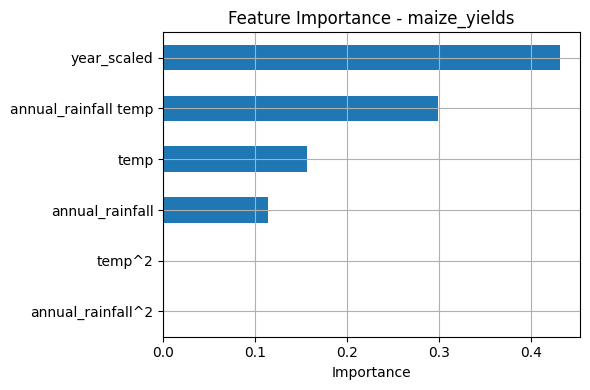

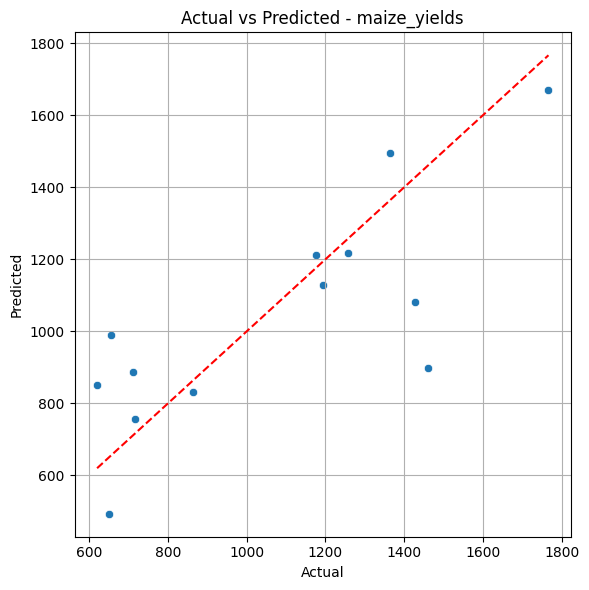

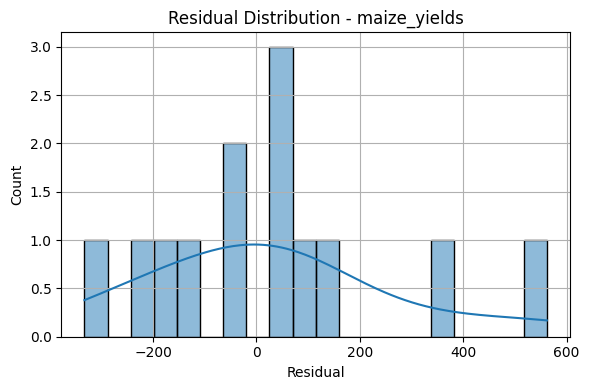

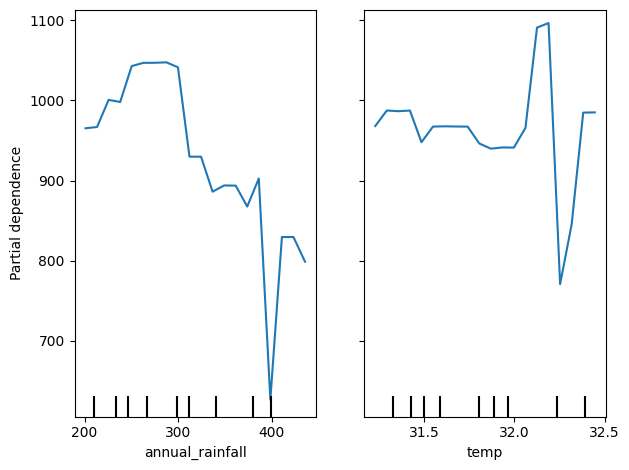


SORGHUM_YIELDS Model Performance
RMSE: 181.85
R²: -0.1494


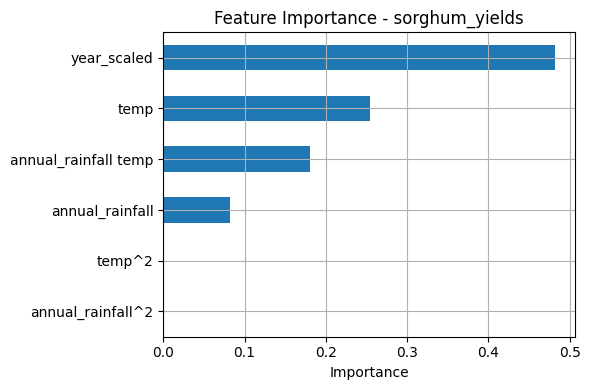

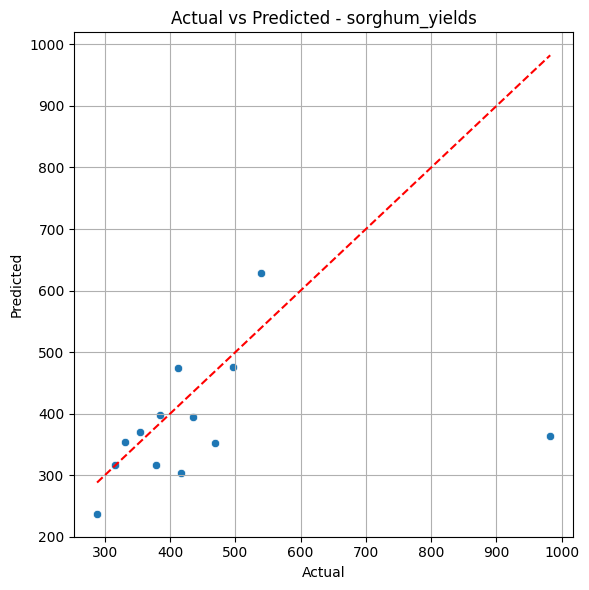

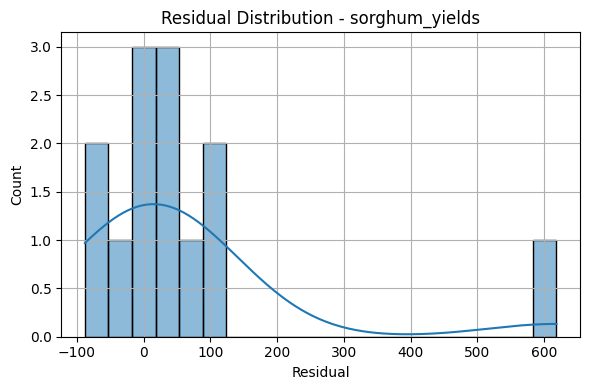

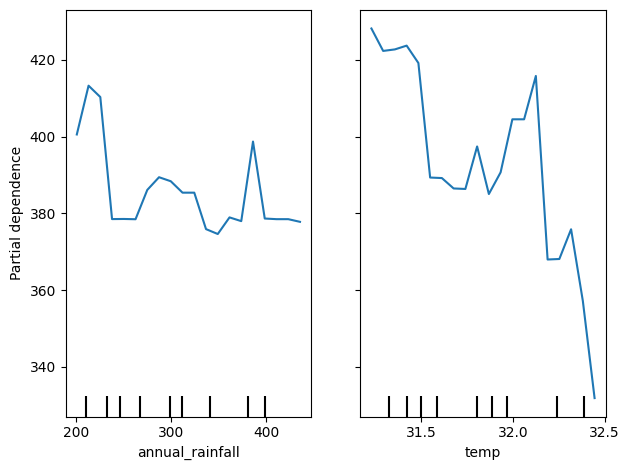

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures # Add this line
from sklearn.inspection import PartialDependenceDisplay




# Load and clean data
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
precip = pd.read_csv("annual_precipitation.csv")
temp = pd.read_csv("annual_temperature.csv")

for df in [maize, sorghum, precip, temp]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df = maize.merge(sorghum, on='year').merge(
    precip[['year', 'annual_rainfall']], on='year'
).merge(
    temp[['year', 'max_temp']], on='year'
)

df.rename(columns={
    'annual_precipitation': 'precip',
    'max_temp': 'temp'
}, inplace=True)

# Feature engineering
df['year_scaled'] = (df['year'] - df['year'].mean()) / df['year'].std()

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['annual_rainfall', 'temp']])
feature_names = poly.get_feature_names_out(['annual_rainfall', 'temp'])
X_df = pd.DataFrame(X_poly, columns=feature_names)
X_df['year_scaled'] = df['year_scaled']

X_df.dropna(inplace=True)
y_maize = df.loc[X_df.index, 'maize_yields']
y_sorghum = df.loc[X_df.index, 'sorghum_yields']

def run_model(X, y, label):
    from sklearn.linear_model import LinearRegression
    from scipy.stats import linregress

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Fit XGBoost model
    model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n{label.upper()} Model Performance")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Plot: Feature importance
    pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh', figsize=(6, 4))
    plt.title(f"Feature Importance - {label}")
    plt.xlabel("Importance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Actual vs. Predicted
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {label}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"Residual Distribution - {label}")
    plt.xlabel("Residual")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
        # Partial Dependence Plot
    from sklearn.inspection import PartialDependenceDisplay
    PartialDependenceDisplay.from_estimator(
        model, X_train, features=[0, 1], feature_names=X.columns, grid_resolution=20
    )
    plt.tight_layout()
    plt.show()

run_model(X_df, y_maize, 'maize_yields')
run_model(X_df, y_sorghum, 'sorghum_yields')





# **Sorghum Prediction**

Ridge Regression (poly+anomaly features) RMSE: 117.37
Ridge Regression (poly+anomaly features) R²: 0.1692

Top 10 Ridge coefficients (by absolute value):
temp_anomaly rain_anomaly       16.213312
max_dry_days annual_rainfall    13.663194
max_dry_days rain_anomaly        9.554407
r50mm^2                         -9.036229
annual_rainfall temp_anomaly     8.281000
rain_anomaly^2                  -8.131077
hot_days rain_anomaly            7.394733
annual_rainfall hot_days         7.331826
temp_anomaly^2                  -7.108237
max_temp annual_rainfall         6.760761
dtype: float64


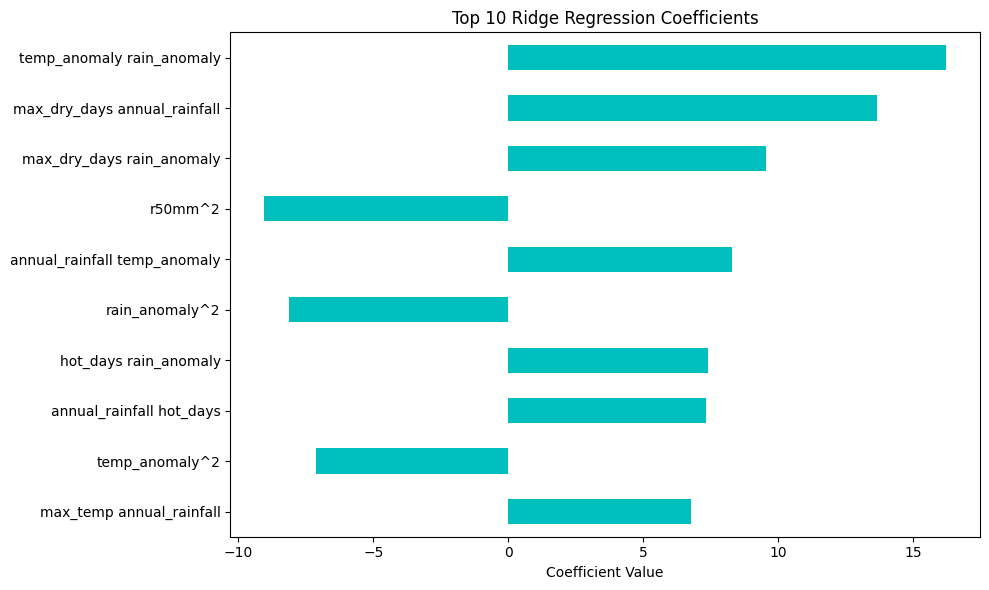

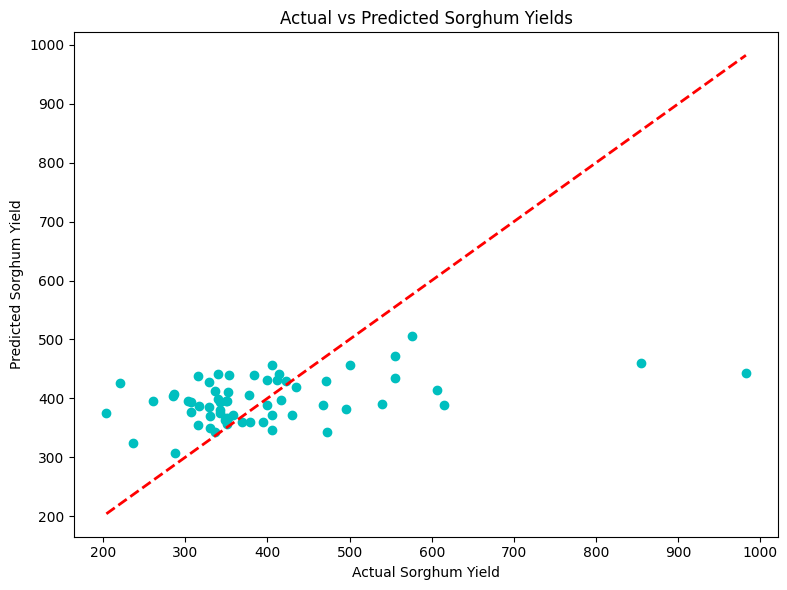

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading all datasets
yields = pd.read_csv("sorghum_yields.csv")
dry_days = pd.read_csv("annual_max_dry_days.csv")
temp = pd.read_csv("annual_temperature.csv")
rain = pd.read_csv("annual_precipitation.csv")
hot_days = pd.read_csv("number_hot_days_30_annual.csv")
r50mm = pd.read_csv("r50mm_annual.csv")
r20mm = pd.read_csv("r20mm_annual.csv")

# Standardize column names
for df in [yields, dry_days, temp, rain, hot_days, r50mm, r20mm]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename columns for consistency
r50mm.rename(columns={'number_days_precip>50(mm)': 'r50mm'}, inplace=True)
r20mm.rename(columns={'number_days_precip>20(mm)': 'r20mm'}, inplace=True)

# Merge all data on 'year'
df = yields.merge(dry_days, on='year') \
           .merge(temp, on='year') \
           .merge(rain, on='year') \
           .merge(hot_days, on='year') \
           .merge(r50mm, on='year') \
           .merge(r20mm, on='year')

# --- Feature Engineering ---

# Anomalies (z-scores) for temp and rainfall
df['temp_anomaly'] = (df['max_temp'] - df['max_temp'].mean()) / df['max_temp'].std()
df['rain_anomaly'] = (df['annual_rainfall'] - df['annual_rainfall'].mean()) / df['annual_rainfall'].std()

# Polynomial and interaction features (degree 2)
base_features = [
    'max_dry_days', 'max_temp', 'annual_rainfall', 'hot_days', 'r50mm', 'r20mm',
    'temp_anomaly', 'rain_anomaly'
]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[base_features])
feature_names = poly.get_feature_names_out(base_features)
X_df = pd.DataFrame(X_poly, columns=feature_names)

# Target variable
y = df['sorghum_yields']

# Standardize features (important for Ridge)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Ridge regression with LOOCV
alphas = np.logspace(-3, 3, 100)
loo = LeaveOneOut()
ridge = RidgeCV(alphas=alphas, cv=loo, scoring='neg_mean_squared_error')
ridge.fit(X_scaled, y)
y_pred = ridge.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Ridge Regression (poly+anomaly features) RMSE: {rmse:.2f}")
print(f"Ridge Regression (poly+anomaly features) R²: {r2:.4f}")

# Show top coefficients
coef_df = pd.Series(ridge.coef_, index=feature_names).sort_values(key=abs, ascending=False)
print("\nTop 10 Ridge coefficients (by absolute value):")
print(coef_df.head(10))

# --- Visualization ---

# Bar plot: Top 10 coefficients
top10 = coef_df.head(10)
plt.figure(figsize=(10,6))
top10.plot(kind='barh', color='c')
plt.xlabel("Coefficient Value")
plt.title("Top 10 Ridge Regression Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='c')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sorghum Yield")
plt.ylabel("Predicted Sorghum Yield")
plt.title("Actual vs Predicted Sorghum Yields")
plt.tight_layout()
plt.show()











# **Child Stunting Prediction Model**

Linear Regression Model Performance
Stunting - RMSE: 0.81, R²: 0.9767


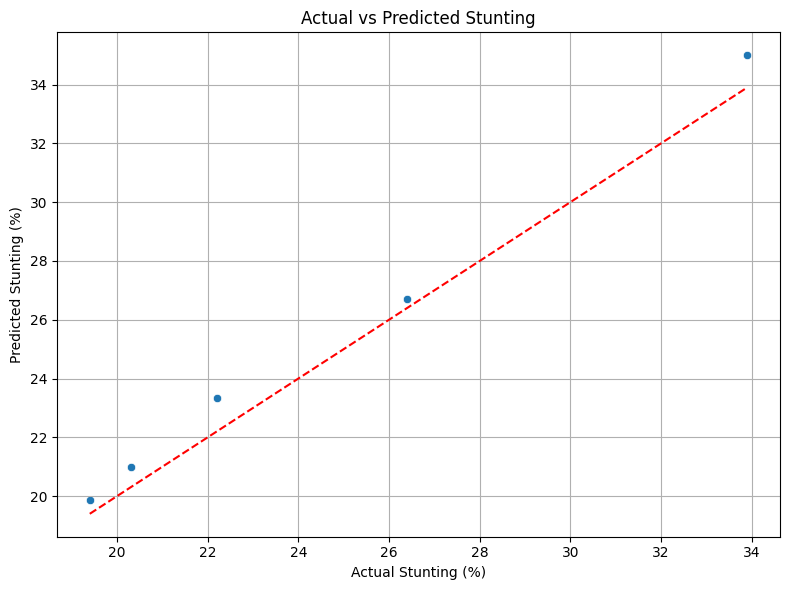

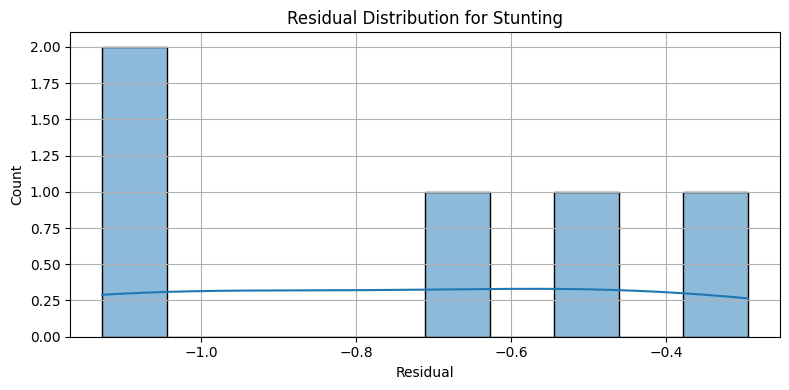

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
malnutrition = pd.read_csv("child_malnutrition_2000_2023.csv")
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
r20mm = pd.read_csv("r20mm_annual.csv")
water_sanitation = pd.read_csv("water_sanitation.csv")

# Standardize column names
for df in [malnutrition, maize, sorghum, r20mm, water_sanitation]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename r20mm column for clarity
r20mm.rename(columns={'number_days_precip>20(mm)': 'r20mm'}, inplace=True)

# Merge datasets on year
df = (malnutrition
      .merge(maize, on='year')
      .merge(sorghum, on='year')
      .merge(r20mm, on='year')
      .merge(water_sanitation, on='year'))

# Define predictors and target
X = df[['maize_yields', 'sorghum_yields', 'r20mm', 'pct_basic_drinking_water', 'pct_basic_sanitation']]
y = df['stunting_(%)']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
rmse_stunting = np.sqrt(mean_squared_error(y_test, y_pred))
r2_stunting = r2_score(y_test, y_pred)

print("Linear Regression Model Performance")
print(f"Stunting - RMSE: {rmse_stunting:.2f}, R²: {r2_stunting:.4f}")

# --- Visualization ---

# Plot actual vs predicted for stunting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Stunting (%)')
plt.ylabel('Predicted Stunting (%)')
plt.title('Actual vs Predicted Stunting')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Residual Distribution for Stunting')
plt.xlabel('Residual')
plt.tight_layout()
plt.grid(True)
plt.show()







# **Child Wasting Prediction Model**

Random Forest Model Performance
Wasting - RMSE: 3.46, R²: 0.4197


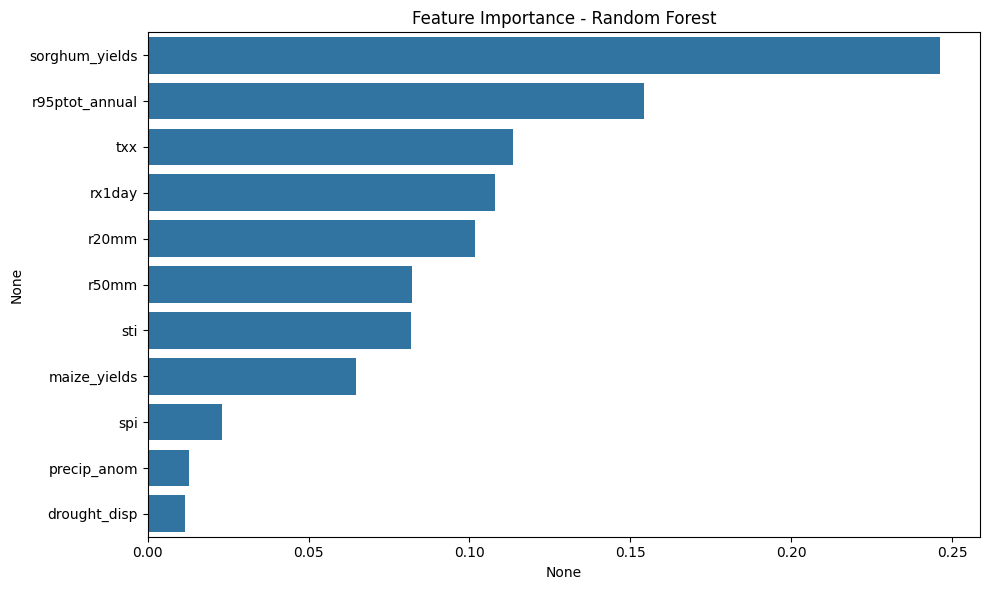

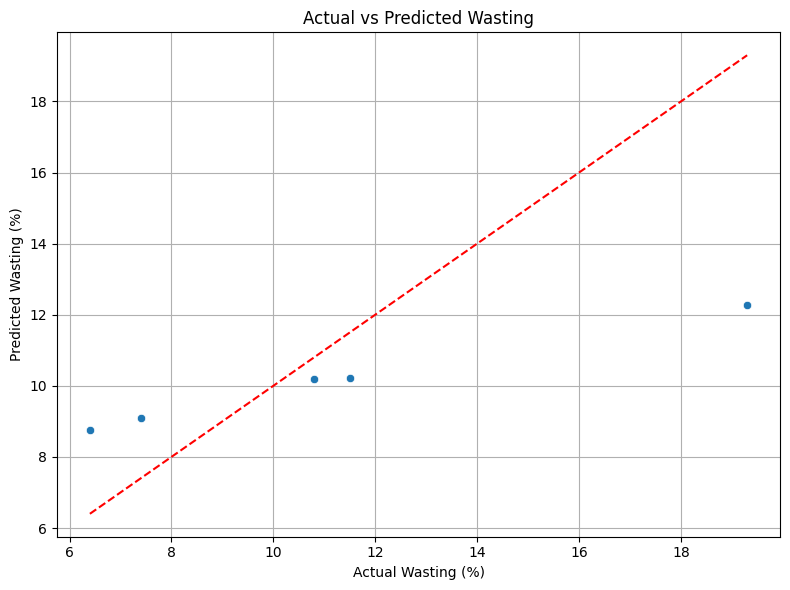

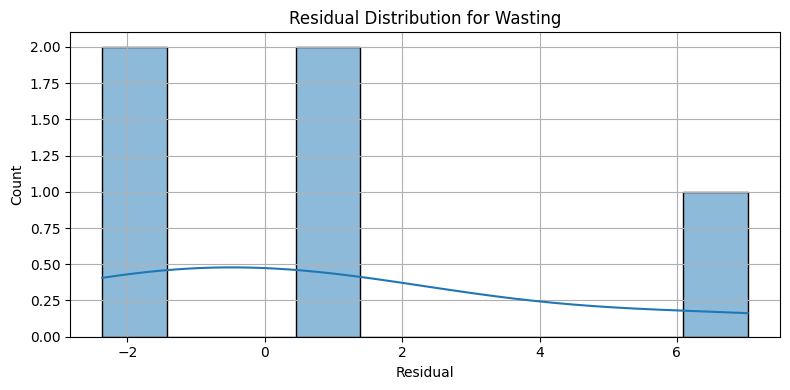

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
malnutrition = pd.read_csv("child_malnutrition_2000_2023.csv")
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
annual_precip = pd.read_csv("annual_precipitation.csv")
annual_temp = pd.read_csv("annual_temperature.csv")
r95 = pd.read_csv("r95ptot_annual.csv")
r20mm = pd.read_csv("r20mm_annual.csv")
r50mm = pd.read_csv("r50mm_annual.csv")
rx1day = pd.read_csv("rx1day_annual.csv")
txx_annual = pd.read_csv("txx_annual.csv")
disp = pd.read_excel("IDMC_GIDD_Disasters_Internal_Displacement_Data.xlsx", sheet_name="1_Disaster_Displacement_data")
disp = disp[(disp['ISO3'] == 'SOM') & (disp['Hazard Type'] == 'Drought')]
drought_disp = disp.groupby('Year')['Disaster Internal Displacements'].sum().reset_index()
drought_disp.columns = ['year', 'drought_disp']

# Standardize column names
for df in [malnutrition, maize, sorghum, annual_precip, annual_temp, r95, r20mm, r50mm, rx1day, txx_annual, drought_disp]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

r95.rename(columns={'total_precip_95p(mm)': 'r95ptot_annual'}, inplace=True)
r20mm.rename(columns={'number_days_precip>20(mm)': 'r20mm'}, inplace=True)
r50mm.rename(columns={'number_days_precip>50(mm)': 'r50mm'}, inplace=True)

# Filter all datasets to 2000-2023
years = set(malnutrition['year'])
for df in [maize, sorghum, annual_precip, annual_temp, r95, r20mm, r50mm, rx1day, txx_annual, drought_disp]:
    df.drop(df[~df['year'].isin(years)].index, inplace=True)

# --- Drought and Flood Features ---
# SPI: Standardized Precipitation Index
precip_mean = annual_precip['annual_rainfall'].mean()
precip_std = annual_precip['annual_rainfall'].std()
annual_precip['spi'] = (annual_precip['annual_rainfall'] - precip_mean) / precip_std

# STI: Standardized Temperature Index
temp_mean = annual_temp['max_temp'].mean()
temp_std = annual_temp['max_temp'].std()
annual_temp['sti'] = (annual_temp['max_temp'] - temp_mean) / temp_std

# Rainfall anomaly (z-score)
annual_precip['precip_anom'] = (annual_precip['annual_rainfall'] - precip_mean) / precip_std

# Merge all datasets on year
df = (malnutrition
      .merge(maize, on='year')
      .merge(sorghum, on='year')
      .merge(annual_precip[['year', 'spi', 'precip_anom']], on='year')
      .merge(annual_temp[['year', 'sti']], on='year')
      .merge(r95[['year', 'r95ptot_annual']], on='year')
      .merge(r20mm[['year', 'r20mm']], on='year')
      .merge(r50mm[['year', 'r50mm']], on='year')
      .merge(rx1day[['year', 'rx1day']], on='year')
      .merge(txx_annual[['year', 'txx']], on='year')
      .merge(drought_disp[['year', 'drought_disp']], on='year', how='left'))

df['drought_disp'] = df['drought_disp'].fillna(0)
df = df.dropna().reset_index(drop=True)

# Define predictors and target
X = df[['maize_yields', 'sorghum_yields', 'spi', 'sti', 'precip_anom', 'r95ptot_annual', 'r20mm', 'r50mm', 'rx1day', 'txx', 'drought_disp']]
y = df['wasting_(%)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance")
print(f"Wasting - RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Plot actual vs predicted for wasting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Wasting (%)')
plt.ylabel('Predicted Wasting (%)')
plt.title('Actual vs Predicted Wasting')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Residual Distribution for Wasting')
plt.xlabel('Residual')
plt.tight_layout()
plt.grid(True)
plt.show()




# **SSP1-2.6 Climate Scenarios Analysis**

    year  stunting_mean  stunting_low  stunting_high  wasting_mean  \
0   2025      20.696316     25.923204      15.307199      9.240847   
1   2026      21.198577     26.882331      15.313806      9.384952   
2   2027      21.084724     25.222106      14.636642      9.331898   
3   2028      19.454223     25.841623      13.632922      8.828692   
4   2029      19.628010     25.865840      13.908107      8.990121   
5   2030      20.342343     27.422857      14.375562      9.212061   
6   2031      19.672939     26.234219      13.222438      8.765719   
7   2032      19.414392     25.558827      13.054442      8.756666   
8   2033      19.914735     25.774063      13.635378      8.744480   
9   2034      19.091388     26.372920      12.181730      8.478236   
10  2035      19.010706     23.925069      11.798300      9.096458   
11  2036      18.896833     25.072775      11.516855      8.737721   
12  2037      18.640426     24.438328      11.354030      8.732539   
13  2038      17.780

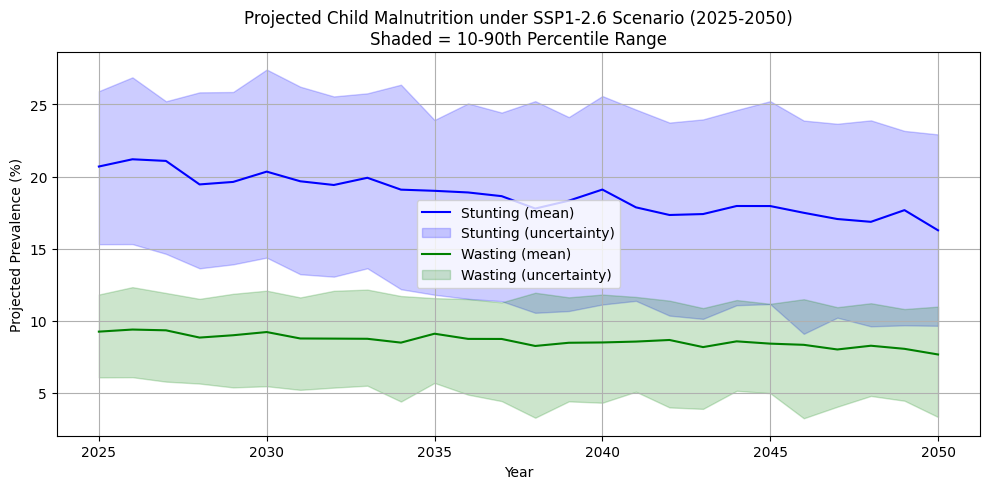

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- 1. Loading Data ---
mal = pd.read_csv("child_malnutrition_2000_2023.csv")
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
precip = pd.read_csv("annual_precipitation.csv")
temp = pd.read_csv("annual_temperature.csv")

mal.columns = mal.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')
maize.columns = maize.columns.str.strip().str.lower()
sorghum.columns = sorghum.columns.str.strip().str.lower()
precip.columns = precip.columns.str.strip().str.lower().str.replace(' ', '_')
temp.columns = temp.columns.str.strip().str.lower().str.replace(' ', '_')

historical_df = mal.merge(maize, on='year', how='left') \
    .merge(sorghum, on='year', how='left') \
    .merge(precip[['year', 'annual_rainfall']], on='year', how='left') \
    .merge(temp[['year', 'max_temp']], on='year', how='left')

features = ['max_temp', 'annual_rainfall', 'maize_yields', 'sorghum_yields']
X = historical_df[features]
y_stunt = historical_df['stunting_(percent)']
y_waste = historical_df['wasting_(percent)']

mask = X.notnull().all(axis=1) & y_stunt.notnull() & y_waste.notnull()
X = X[mask]
y_stunt = y_stunt[mask]
y_waste = y_waste[mask]

reg_stunt = LinearRegression().fit(X, y_stunt)
reg_waste = LinearRegression().fit(X, y_waste)

# --- 2. Load Projected Climate Data for SSP1-2.6 ---
proj_temp = pd.read_csv("projected_temp.csv")
proj_precip = pd.read_csv("projected_precip.csv")

# Extract SSP1-2.6 mean, low, and high columns
cols_temp = ['Category', 'SSP1-2.6', 'SSP1-2.6 10-90th Percentile Range (low)', 'SSP1-2.6 10-90th Percentile Range (high)']
cols_precip = ['Category', 'SSP1-2.6', 'SSP1-2.6 10-90th Percentile Range (low)', 'SSP1-2.6 10-90th Percentile Range (high)']

proj_temp_ssp = proj_temp[cols_temp].copy()
proj_precip_ssp = proj_precip[cols_precip].copy()

# Renaming to match model's expected feature names
proj_temp_ssp.rename(columns={
    'Category': 'year',
    'SSP1-2.6': 'annual_average_maximum_surface_air_temperature',
    'SSP1-2.6 10-90th Percentile Range (low)': 'annual_average_maximum_surface_air_temperature_low',
    'SSP1-2.6 10-90th Percentile Range (high)': 'annual_average_maximum_surface_air_temperature_high'
}, inplace=True)
proj_precip_ssp.rename(columns={
    'Category': 'year',
    'SSP1-2.6': 'annual_precipitation',
    'SSP1-2.6 10-90th Percentile Range (low)': 'annual_precipitation_low',
    'SSP1-2.6 10-90th Percentile Range (high)': 'annual_precipitation_high'
}, inplace=True)

proj_temp_ssp['year'] = proj_temp_ssp['year'].astype(int)
proj_precip_ssp['year'] = proj_precip_ssp['year'].astype(int)

proj_climate = proj_temp_ssp.merge(proj_precip_ssp, on='year')

# Filter for projection years (e.g., 2025–2050)
proj_climate = proj_climate[(proj_climate['year'] >= 2025) & (proj_climate['year'] <= 2050)].reset_index(drop=True)

# --- 3. Add Crop Yield Assumptions (last observed values) ---
last_maize = historical_df['maize_yields'].dropna().iloc[-1]
last_sorghum = historical_df['sorghum_yields'].dropna().iloc[-1]
proj_climate['maize_yields'] = last_maize
proj_climate['sorghum_yields'] = last_sorghum

# --- 4. Prepare Features and Predict for Mean, Low, High ---
def make_projection(temp_col, precip_col):
    X_proj = pd.DataFrame({
        'max_temp': proj_climate[temp_col],
        'annual_rainfall': proj_climate[precip_col],
        'maize_yields': proj_climate['maize_yields'],
        'sorghum_yields': proj_climate['sorghum_yields']
    })
    return (
        reg_stunt.predict(X_proj),
        reg_waste.predict(X_proj)
    )

proj_climate['stunting_mean'], proj_climate['wasting_mean'] = make_projection(
    'annual_average_maximum_surface_air_temperature', 'annual_precipitation'
)
proj_climate['stunting_low'], proj_climate['wasting_low'] = make_projection(
    'annual_average_maximum_surface_air_temperature_low', 'annual_precipitation_low'
)
proj_climate['stunting_high'], proj_climate['wasting_high'] = make_projection(
    'annual_average_maximum_surface_air_temperature_high', 'annual_precipitation_high'
)

# --- 5. Show and Visualize Results ---
print(proj_climate[['year', 'stunting_mean', 'stunting_low', 'stunting_high', 'wasting_mean', 'wasting_low', 'wasting_high']])

plt.figure(figsize=(10,5))
plt.plot(proj_climate['year'], proj_climate['stunting_mean'], label='Stunting (mean)', color='blue')
plt.fill_between(proj_climate['year'], proj_climate['stunting_low'], proj_climate['stunting_high'], color='blue', alpha=0.2, label='Stunting (uncertainty)')
plt.plot(proj_climate['year'], proj_climate['wasting_mean'], label='Wasting (mean)', color='green')
plt.fill_between(proj_climate['year'], proj_climate['wasting_low'], proj_climate['wasting_high'], color='green', alpha=0.2, label='Wasting (uncertainty)')
plt.xlabel('Year')
plt.ylabel('Projected Prevalence (%)')
plt.title('Projected Child Malnutrition under SSP1-2.6 Scenario (2025-2050)\nShaded = 10-90th Percentile Range')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **SSP5-8.5 Climate Scenario Analysis**

    year  stunting_mean  stunting_low  stunting_high  wasting_mean  \
0   2025      20.716847     25.886351      14.568426      9.430795   
1   2026      20.801737     25.987697      13.823925      9.125829   
2   2027      19.910996     26.808717      13.987899      9.196189   
3   2028      19.765538     25.586447      14.549203      8.933161   
4   2029      19.528059     26.982633      11.987341      8.809384   
5   2030      19.064027     25.094051      13.191593      8.428760   
6   2031      18.734323     24.849965      11.260987      8.138213   
7   2032      19.239173     24.787333      12.380928      8.745471   
8   2033      19.148958     24.981221      12.299202      8.735161   
9   2034      18.869379     24.655389      12.074711      8.688077   
10  2035      17.827259     24.531820      10.527710      8.331881   
11  2036      16.979364     23.360715      10.255705      8.326894   
12  2037      17.547664     23.422287       9.369135      8.743238   
13  2038      16.582

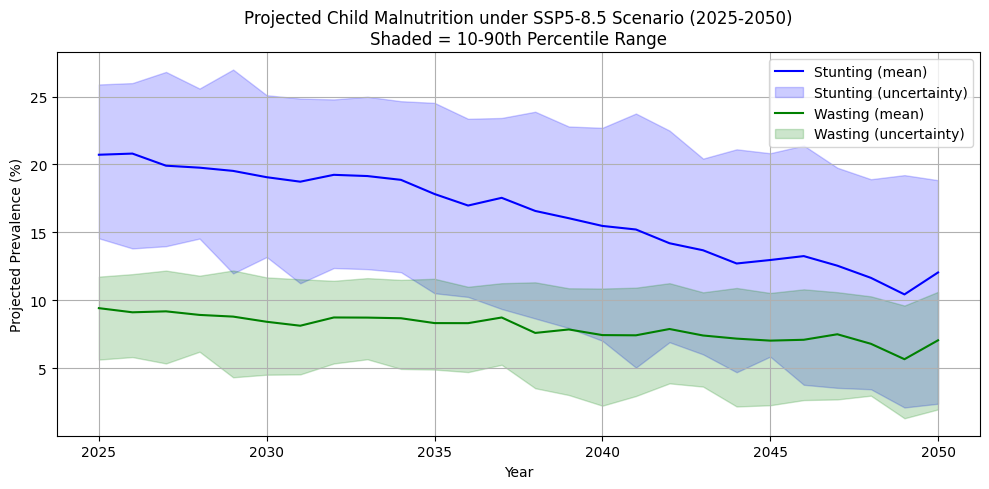

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Loading Data ---
mal = pd.read_csv("child_malnutrition_2000_2023.csv")
maize = pd.read_csv("maize_yields.csv")
sorghum = pd.read_csv("sorghum_yields.csv")
precip = pd.read_csv("annual_precipitation.csv")
temp = pd.read_csv("annual_temperature.csv")

mal.columns = mal.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')
maize.columns = maize.columns.str.strip().str.lower()
sorghum.columns = sorghum.columns.str.strip().str.lower()
precip.columns = precip.columns.str.strip().str.lower().str.replace(' ', '_')
temp.columns = temp.columns.str.strip().str.lower().str.replace(' ', '_')

historical_df = mal.merge(maize, on='year', how='left') \
    .merge(sorghum, on='year', how='left') \
    .merge(precip[['year', 'annual_rainfall']], on='year', how='left') \
    .merge(temp[['year', 'max_temp']], on='year', how='left')

features = ['max_temp', 'annual_rainfall', 'maize_yields', 'sorghum_yields']
X = historical_df[features]
y_stunt = historical_df['stunting_(percent)']
y_waste = historical_df['wasting_(percent)']

mask = X.notnull().all(axis=1) & y_stunt.notnull() & y_waste.notnull()
X = X[mask]
y_stunt = y_stunt[mask]
y_waste = y_waste[mask]

reg_stunt = LinearRegression().fit(X, y_stunt)
reg_waste = LinearRegression().fit(X, y_waste)

# --- 2. Loading Data for SSP5-8.5 ---
proj_temp = pd.read_csv("projected_temp.csv")
proj_precip = pd.read_csv("projected_precip.csv")

# Extract SSP5-8.5 mean, low, and high columns
cols_temp = ['Category', 'SSP5-8.5', 'SSP5-8.5 10-90th Percentile Range (low)', 'SSP5-8.5 10-90th Percentile Range (high)']
cols_precip = ['Category', 'SSP5-8.5', 'SSP5-8.5 10-90th Percentile Range (low)', 'SSP5-8.5 10-90th Percentile Range (high)']

proj_temp_ssp = proj_temp[cols_temp].copy()
proj_precip_ssp = proj_precip[cols_precip].copy()

# Renaming to match model's expected feature names
proj_temp_ssp.rename(columns={
    'Category': 'year',
    'SSP5-8.5': 'max_temp',
    'SSP5-8.5 10-90th Percentile Range (low)': 'max_temp_low',
    'SSP5-8.5 10-90th Percentile Range (high)': 'max_temp_high'
}, inplace=True)
proj_precip_ssp.rename(columns={
    'Category': 'year',
    'SSP5-8.5': 'annual_rainfall',
    'SSP5-8.5 10-90th Percentile Range (low)': 'annual_rainfall_low',
    'SSP5-8.5 10-90th Percentile Range (high)': 'annual_rainfall_high'
}, inplace=True)

proj_temp_ssp['year'] = proj_temp_ssp['year'].astype(int)
proj_precip_ssp['year'] = proj_precip_ssp['year'].astype(int)

proj_climate = proj_temp_ssp.merge(proj_precip_ssp, on='year')

# Filter for projection years (e.g., 2025–2050)
proj_climate = proj_climate[(proj_climate['year'] >= 2025) & (proj_climate['year'] <= 2050)].reset_index(drop=True)

# --- 3. Add Crop Yield Assumptions (last observed values) ---
last_maize = historical_df['maize_yields'].dropna().iloc[-1]
last_sorghum = historical_df['sorghum_yields'].dropna().iloc[-1]
proj_climate['maize_yields'] = last_maize
proj_climate['sorghum_yields'] = last_sorghum

# --- 4. Prepare Features and Predict for Mean, Low, High ---
def make_projection(temp_col, precip_col):
    X_proj = pd.DataFrame({
        'max_temp': proj_climate[temp_col],
        'annual_rainfall': proj_climate[precip_col],
        'maize_yields': proj_climate['maize_yields'],
        'sorghum_yields': proj_climate['sorghum_yields']
    })
    return (
        reg_stunt.predict(X_proj),
        reg_waste.predict(X_proj)
    )

proj_climate['stunting_mean'], proj_climate['wasting_mean'] = make_projection('max_temp', 'annual_rainfall')
proj_climate['stunting_low'], proj_climate['wasting_low'] = make_projection('max_temp_low', 'annual_rainfall_low')
proj_climate['stunting_high'], proj_climate['wasting_high'] = make_projection('max_temp_high', 'annual_rainfall_high')

# --- 5. Show and Visualize Results ---
print(proj_climate[['year', 'stunting_mean', 'stunting_low', 'stunting_high', 'wasting_mean', 'wasting_low', 'wasting_high']])

plt.figure(figsize=(10,5))
plt.plot(proj_climate['year'], proj_climate['stunting_mean'], label='Stunting (mean)', color='blue')
plt.fill_between(proj_climate['year'], proj_climate['stunting_low'], proj_climate['stunting_high'], color='blue', alpha=0.2, label='Stunting (uncertainty)')
plt.plot(proj_climate['year'], proj_climate['wasting_mean'], label='Wasting (mean)', color='green')
plt.fill_between(proj_climate['year'], proj_climate['wasting_low'], proj_climate['wasting_high'], color='green', alpha=0.2, label='Wasting (uncertainty)')
plt.xlabel('Year')
plt.ylabel('Projected Prevalence (%)')
plt.title('Projected Child Malnutrition under SSP5-8.5 Scenario (2025-2050)\nShaded = 10-90th Percentile Range')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
